<a href="https://colab.research.google.com/github/realyou0312/Lec_Internship/blob/main/sim_chap_7_Konlpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 92kB 4.1MB/s 
     |████████████████████████████████| 450kB 44.8MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [3]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

In [4]:
# sim_chap_7 : 한글 텍스트 분석

#Step 1. 필요한 모듈을 실행합니다
from konlpy.tag import Kkma
import matplotlib.pyplot as plt  #pip 먼저 해야함
from matplotlib import font_manager, rc  #pip 먼저 해야함  
from wordcloud import WordCloud   #pip 먼저 해야함
# wordcloud 설치할 때 setuptools 에러나면 아래 코드 실행후 재실행
# pip install -U pip setuptools

from collections import Counter
import numpy as np
kkma = Kkma( )

In [5]:
# Step 2. 파일 불러와서 형태소 분석하기
data1 = open("/content/drive/MyDrive/Internship/경주여행_지식인_2016_2.txt", encoding='cp949').read()


## 위  data2 에 있는 단어를 언급 빈도별로 집계하는 코드를 아래 (  ) 안에 완성하세요.
data2 = kkma.nouns(data1)

data3 = Counter(data2)

In [6]:
# Step 3. 불용어 제거하기
stop_words = open("/content/drive/MyDrive/Internship/stop_words.txt", encoding='cp949').read()
data3 = [ each_word for each_word in data2 
             if each_word not in stop_words ]
data3
#1글자 이하이거나 10 글자 이상인 단어 삭제하기 : 글자 수 지정 = 띄어쓰기 되지 않는 문자 거르기
data4=[ ]
for i in range(0,len(data3)) :
       if len(data3[i]) >= 2 | len(data3[i]) <= 10 :
            data4.append(data3[i])

In [7]:
#Step 4. 단어 별 빈도수 집계하기
data5 = Counter(data4)
data6 = data5.most_common(100)
tmp_data = dict(data6)

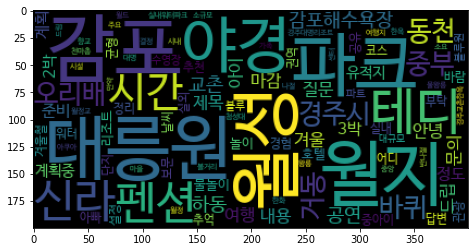

In [8]:
# Step 5. 워드 클라우드 그리기
wordcloud = WordCloud(font_path,
                      relative_scaling = 0.2,
                      background_color='black',
                      ).generate_from_frequencies(tmp_data)
plt.figure(figsize=(8,4))
plt.imshow(wordcloud)
plt.axis('on')
plt.show( )

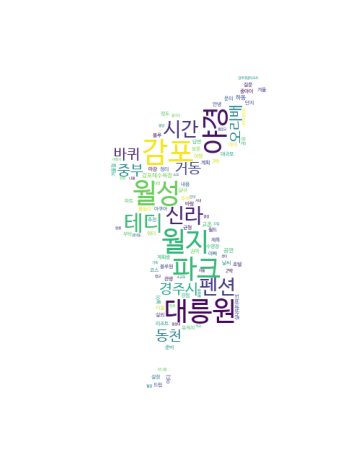

In [9]:
import numpy as np        
from PIL import Image   
from wordcloud import ImageColorGenerator

jeju_mask = np.array(Image.open("/content/drive/MyDrive/Internship/korea.jpg"))

# 아래 코드에서 출력 결과를 대한민국 지도 형상으로 하기 위해서 설정해야 할 옵션을 (    )에 완성하세요

wc = WordCloud(font_path ,
                      relative_scaling = 0.2, mask=jeju_mask ,
                      background_color='white',
                      min_font_size=1 ,
                      max_font_size=40,
                      max_words=2000,
                      ).generate_from_frequencies(tmp_data)

plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.axis("off")
plt.show( )